### 데이터 준비

In [1]:
# https://gist.github.com/rickiepark/b90b9f725890653e69a1a52943671c62

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) # stratify: 클래스 비율에 맞게 데이터를 나눔

# 기본적으로 25%를 테스트로 분리
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 스케일
- 특성 간 스케일이 다를 경우, 부정확한 예측이 발생할 수 있음

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

kn.predict([[25, 150]]) # expected: 1 /  actual : 0

array([0.])

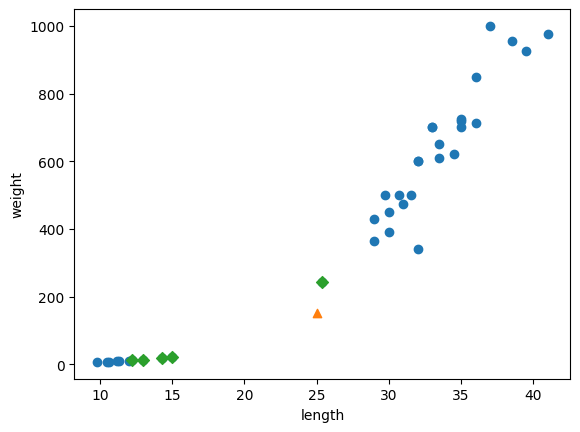

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [12]:
import matplotlib.pyplot as plt

distances, indexs = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(distances)

### 데이터 전처리
- 표준점수: 각 데이터가 원점에서 몇 표준편차만큼 떨어져있는지 나타내는 값 -> 실제 특성값의 크기와 상관 없이 동일한 조건에서 비교 가능
- 표준 점수 = (데이터 - 평균) / 표준편차
- 특성마다 값의 스케일이 다르므로 각 특성별로 계산해야 함

In [14]:
mean = np.mean(train_input, axis=0) #평균
std = np.std(train_input, axis=0) #표준편차

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

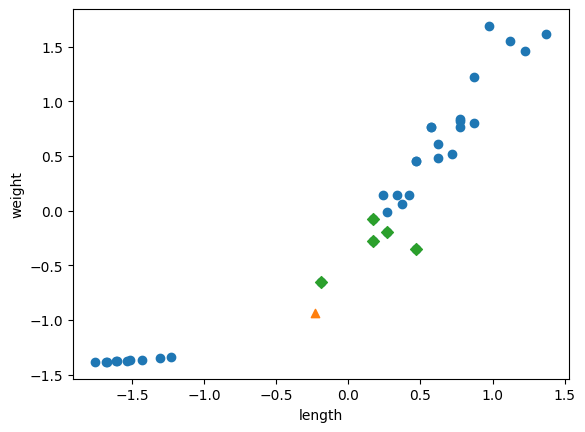

In [19]:
data_scaled = ([25, 150] - mean) / std
distences, indexs = kn.kneighbors([data_scaled])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(data_scaled[0], data_scaled[1], marker='^')
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

kn.predict([data_scaled])

array([1.])